# PA(C)E - CONSTRUCT STAGE

# Logistic Regression

### Introduction:

Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

**Logistic Regression is a technique that models a categorical dependent variable (Y) based on one or more independent variables(X).**

Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.


### Logistic Function (Sigmoid Function):

The sigmoid function is a mathematical function used to map the predicted values to probabilities. It maps any real value into another value within a range of 0 and 1.
The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the **Sigmoid function** or the logistic function.

The below image is showing the logistic function:

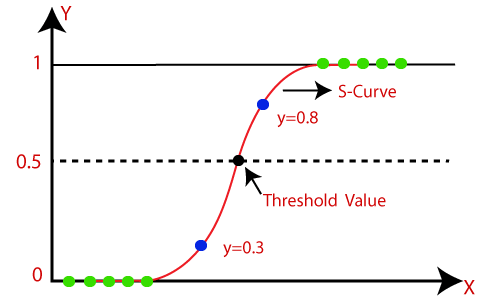

The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

### Assumptions for Logistic Regression:

1. The dependent variable must be categorical and binary / dichotomous.
2. There should be little or no multicollinearity between the independent variables.
3. There is linear relationship of variables to log odds.
4. Requires sufficiently large sample size.
5. There are no extreme outliers.
6. Should have independent observations.

### Steps in Logistic Regression:

1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with existing data
4. Predicting the test result
5. Test accuracy of the result(Creation of Confusion matrix)


## Step 1 - Importing the packages

In [2]:
# importing required packages
# operational packages
import pandas as pd
import numpy as np

# regression modelling packages
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 2 - Loading the data and manipulating it

In [3]:
# loading the data
df0=pd.read_csv(r'C:\Users\Dell\Desktop\Projects\Salifort Motors\Datasets\salifort_data_for_modelling.csv')

In [14]:
# View first 10 rows of the dataset
df0[0:10]

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,5,0.41,0.50,2,153,3,0,1,0,Sales,Low
6,6,0.10,0.77,6,247,4,0,1,0,Sales,Low
7,7,0.92,0.85,5,259,5,0,1,0,Sales,Low
8,8,0.89,1.00,5,224,5,0,1,0,Sales,Low
9,9,0.42,0.53,2,142,3,0,1,0,Sales,Low


In [15]:
# Find total observations in dataset
len(df0.index)

11991

### Removing the outliers

<Axes: xlabel='tenure'>

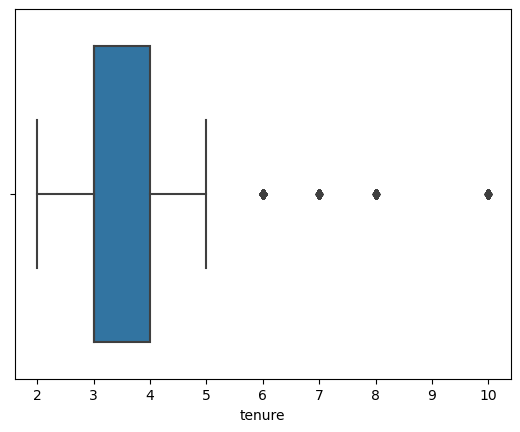

In [16]:
# looking for outliers in 'tenure'
sns.boxplot(data=df0, x='tenure')

Logistic Regression models are very sensitive to outliers, so we will remove these.

In [4]:
# removing the outliers
tenure_iqr = df0['tenure'].quantile(0.75) - df0['tenure'].quantile(0.25)
tenure_upper_limit = df0['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df0['tenure'].quantile(0.25) - 1.5 * tenure_iqr

# creating a new data frame without the outliers
df = df0.loc[(df0['tenure'] < tenure_upper_limit) | (df0['tenure'] > tenure_lower_limit)]

df.head(6)

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,5,0.41,0.50,2,153,3,0,1,0,Sales,Low


### Checking correlation strength between the independent variables

In [5]:
# Correlation matrix
matrix = df.corr().round(2)
print(matrix)

                       Unnamed: 0  satisfaction_level  last_evaluation  \
Unnamed: 0                   1.00                0.22            -0.02   
satisfaction_level           0.22                1.00             0.10   
last_evaluation             -0.02                0.10             1.00   
number_project              -0.02               -0.13             0.27   
average_monthly_hours       -0.04               -0.01             0.26   
tenure                       0.02               -0.15             0.10   
work_accident                0.08                0.04            -0.01   
left                        -0.64               -0.35             0.01   
promotion_last_5years        0.08                0.02            -0.01   

                       number_project  average_monthly_hours  tenure  \
Unnamed: 0                      -0.02                  -0.04    0.02   
satisfaction_level              -0.13                  -0.01   -0.15   
last_evaluation                  0.27      

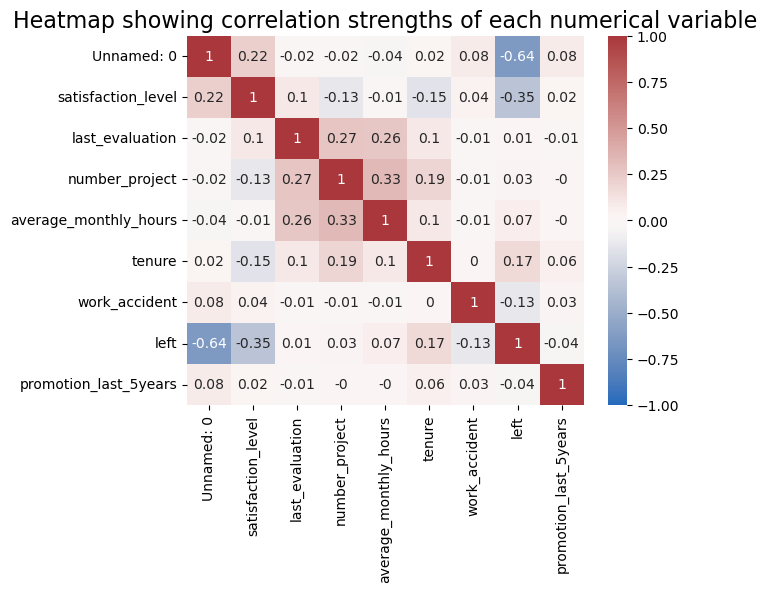

In [6]:
# The heatmap
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Heatmap showing correlation strengths of each numerical variable', fontsize = '16')
plt.show()

In [7]:
# counting the classes from 'left' column - 0 (the employees stayed) , 1(the employees left)
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [8]:
print("The percentage of majority class is:", round((len(df[df['left']==0])/df.shape[0])* 100, 2),'%')

The percentage of majority class is: 83.4 %


### Defining the independent and dependent variables

Our dependent or response variable is 'left' i.e. we are trying to find out whether or not an employee will leave the company, based on other independent variables.

From the heatmap we can see, left is negatively correlated with satisfaction level. Moreover there is no strong correlation among any of the variables. But satisfaction level itself may be influenced by other factors such as working hours, promoted or not, evaluation score, project number etc. 

For the purpose of this project, we'll use only 'satisfaction_level' as our independent variable.

### Checking the model assumptions

1. The dependent variable 'left' is binary i.e. it has only two results 0 (if the employee didn't leave) and 1 (if the employee left).
2. There is little or no multicollinearity between the predictor variables as can be seen from the heatmap and correlation matrix.
3. For this test we assume that there's a linear relation of independent variables to log odds.
4. There are no extreme outliers since we've already removed them from 'tenure' column.
5. For this test we assume that the observations are independent of each other.

## Step 3 - Creating Classification model and fitting the data

In [5]:
# Dependent variable (y) - 'left'
y = df[['left']]

# Independent variable (X) - 'satisfaction_level'
X = df[['satisfaction_level']]

In [6]:
# Split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
# Instantiate the model
clf_log = LogisticRegression()

# Fit the model using the training data
clf=clf_log.fit(X_train,y_train)

## Step 4 - Predicting the test results

The **predict** function works by assuming a threshold of 0.5. So if MLE predicts a value greater than or equal to 0.5, the predict function will label that observation a one. If MLE predicts a value less than 0.5, the predict function will label that observation a zero.

In statistics, Maximum Likelihood Estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

The **predict_proba** function on the other hand, will allow us to check what probability was predicted for each data point.

The **cls.coef_** and **clf.intercept_** give the parameter estimations of the regresssion model. They denote the β0 and β1 respectively.

The **clf.score** gives the ratio of the number of correct predictions to the number of observations.

In [8]:
# use model to make predictions on test data
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [9]:
# matrix of probabilities of the predicted output
clf.predict_proba(X_test)[::,-1]

array([0.53573143, 0.09113835, 0.0715643 , ..., 0.09755904, 0.49820809,
       0.0667279 ])

In [10]:
# value of the slope
clf.coef_

array([[-3.758437]])

In [11]:
# value of the intercept
clf.intercept_

array([0.48142912])

In [12]:
# Gives the ratio of the number of correct predictions to the number of observations
clf.score(X,y)

0.8739054290718039

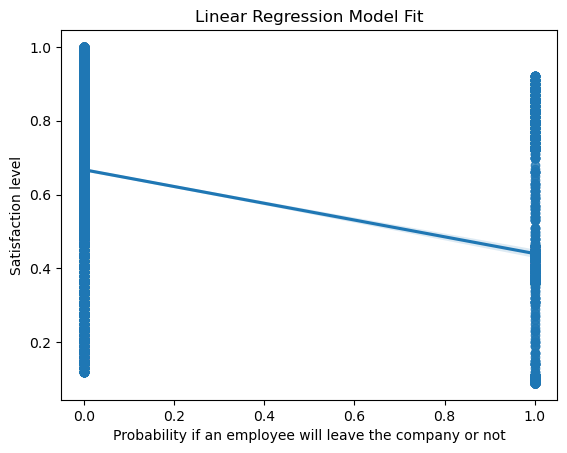

In [26]:
# plotting a regression line using seaborn package
sns.regplot(x='left',y='satisfaction_level', data=df)
plt.xlabel("Probability if an employee will leave the company or not")
plt.ylabel("Satisfaction level")
plt.title("Linear Regression Model Fit")

plt.show()

## Step 5 - Testing the accuracy of the results

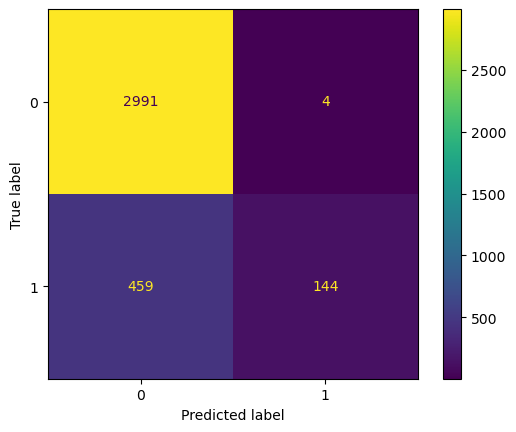

In [13]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [14]:
print("Accuracy:",'%.3f' % metrics.accuracy_score(y_test, y_pred))
print("Precision:", '%.3f' % metrics.precision_score(y_test, y_pred))
print("Recall:", '%.3f' % metrics.recall_score(y_test, y_pred))
print("Specificity:", '%.3f' % recall_score(y_test, y_pred, pos_label=0))
print("f1 score:",'%.3f' % metrics.f1_score(y_test, y_pred))

Accuracy: 0.871
Precision: 0.973
Recall: 0.239
Specificity: 0.999
f1 score: 0.383


### Creating a Classification Report

In [15]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.87      1.00      0.93      2995
    Predicted would leave       0.97      0.24      0.38       603

                 accuracy                           0.87      3598
                macro avg       0.92      0.62      0.66      3598
             weighted avg       0.88      0.87      0.84      3598



In [35]:
# ROC-AUC score
metrics.roc_auc_score(y_test,y_pred)

0.6187352054419057

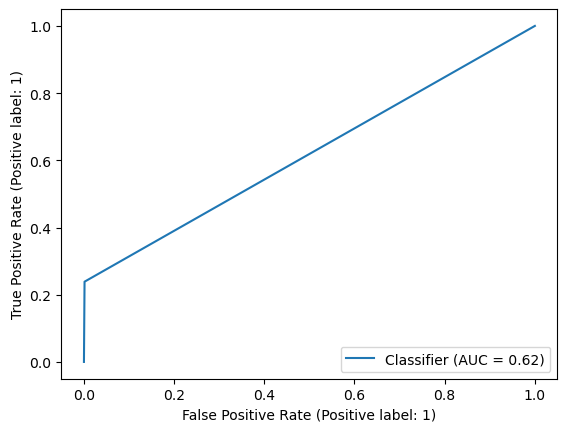

In [33]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

### Interpreting the results

Logistic regression is a powerful technique for categorical prediction tasks in data science. Data professionals often use metrics such as precision, recall, and accuracy, as well as visualizations such as ROC curves, to gauge the performance of their logistic regression models. It is important to evaluate the performance of a model, as this shows how well the model can make predictions. The results from applying metrics can be used to report how well a model performs to relevant stakeholders.

**The logit function**:  When the logit function is written in terms of the independent variables, it conveys the following: there is a linear relationship between each independent variable,X, and the logit of the probability that the dependent variable,y equals 1. The logit of that probability is the logarithm of the odds of that probability. 

Logit is the most common link function used to linearly relate the X variables to the probability of Y.

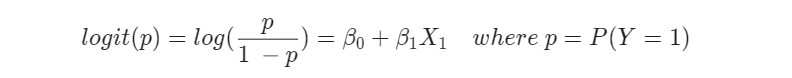

**Coefficients**:  When we fit a logistic regression model, the coefficients in the model output represent the average change in the log odds of the response variable associated with a one unit increase in the predictor variable.

Often we’re more interested in understanding the average change in the odds of the response variable associated with a one unit increase in the predictor variable, which we can find by using the formula e^β.

To access the coefficient β1 estimated by the model, we've used clf.coef_.
For our model, β1= -3.758437

If the estimated β1 is -3.758437, for example, that means a one-unit decrease in satisfaction level is associated with a 3.75 increase in the log odds of p. To interpret change in odds of Y as a percentage, we exponentiate β1 , as follows
 e^β1 = e^(-3.758437) ≈ 0.02332
 
So, for every one-unit decrease in satisfaction level, we can expect that the odds that the employee will leave is increased by 2.33 %.


**Confusion Matrix**: A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

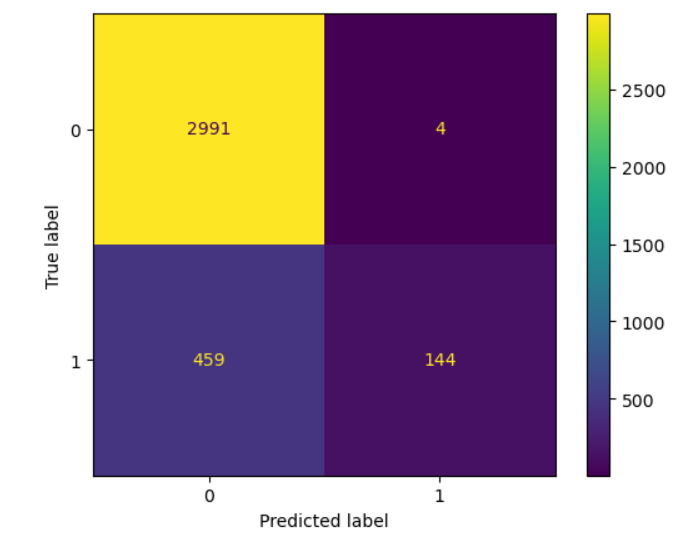

1. **True negatives**:  The count of observations that the classifier correctly predicted as False (0). In this case , the classifier correctly predicted 2991 employees who didn't leave.  

2. **True positives**: The count of observations that a classifier correctly predicted as True (1) i.e. the classifier correctly predicted 144 employees who left.

3. **False positives**: The count of observations that a classifier incorrectly predicted as True (1) i.e. the classifier predicted 4 employees left who in reality didn't leave.

4. **False negatives**: The count of observations that a classifier incorrectly predicted as False (0). In this case, the classifier predicted 459 employees who didn't leave but in reality who left the company.

The False negatives may cause the company to spend more resources on an employee who decides to leave. The False positives may cause the company to think an employee will leave and won't put resources into this employee. **False negatives will be worse for the company, false positives will be worse for employees.**


**Accuracy**: Refers to the proportion of data points that were correctly categorized. Accuracy is an appropriate metric to use when the data is balanced, in other words, when the data has a roughly equal number of positive examples and negative examples. Otherwise, accuracy can be biased.

In this case accuracy will tell us how many correct predictions were made by the model. The model as a relatively high accuracy score of 0.8713 or 87.13% which is not surprising as the data is imbalanced with the majority of the class (employee who stayed) comprises 83.4 % of the total dataset. Thus accuracy is not the right metric to evaluate the model's performance.


**Recall(Sensitivity)**: The proportion of positives the model was able to identify correctly. 

In this case recall tells us how many employees we correctly predicted to be left out of all the left(positive) predictions.The model gives a recall score of 0.2388 or 23.88 %. The model incorrectly predicted majority of the employees who left as employees who've stayed. 

Using recall as an evaluation metric is especially helpful in this context where the cost of a false negative is quite high (the company will assume these employees will stay and spend resources on them while in reality they're most likely to leave).

**Specificity**: The proportion of negatives the model was able to identify correctly.

In this case specificity tells us how many employees we correctly predicted to stay out of all the not left/stayed (negative) predictions.The model gives a specificity score of 0.9986 or 99.86 %. The model correctly predicted majority of the employees who stayed as employees who've actually stayed.

**Precision**: The proportion of positive predictions that were true positives. 

In this case precision would tell us among the employees we predicted to be left, how many of them are actually left. The model gives a precision score of 0.9729 or 97.3 %.

**f1 Score**: It’s a harmonic mean of “precision” & “recall”, taking both the metrics into account. In this case f1-score is very low 0.3834.

**Support**: It is the total entries of each class in the actual dataset. It is simply the sum of rows for every class. The number of total *left* employee predicted was 603 and *stayed* employee predicted were 2995.

**ROC Score**: We can examine an ROC curve to observe how the False Positive Rate and True Positive Rate change together over the different thresholds. In the ROC curve for an ideal model, there would exist a threshold at which the True Positive Rate is high and the False Positive Rate is low. The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.

In this case, the roc_auc_score() function returns 0.6187, that means ~ 62% of the classifier’s predictions are correct across all classification thresholds. 

## List of References:

* [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

* [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn.metrics.recall_score)

* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score)

* [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)

* [roc-auc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

* [Confusion Matrix](https://youtu.be/Kdsp6soqA7o?si=5fiS9byN5i13ODRx)

* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 
* [Logistic Regression Explained](https://youtu.be/yIYKR4sgzI8?si=IEurObJZiTn75BWV)

* [What Is Logistic Regression? Equation, Assumptions, Types, and Best Practices](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/amp/)

* [Assumptions of Logistic Regression](https://www.statology.org/assumptions-of-logistic-regression/)

* [Logistic regression Tutorial](https://realpython.com/logistic-regression-python/)

* [Logistic regression Tutorial JavaPoint](https://www.javatpoint.com/logistic-regression-in-machine-learning)

* [Logistic regression Github](https://github.com/Statology/Python-Guides/blob/main/logistic_regression.py)

* [Logistic regression with Mathematics](https://towardsai.net/p/machine-learning/logistic-regression-with-mathematics)

* [Logistic regression Coefficients Interpretation](https://www.statology.org/interpret-logistic-regression-coefficients/)

* [Reference guide for interpreting the logistic regression model](https://docs.google.com/document/d/1Pi3JxADgy0-JGO_mcRvBPWPavyS6kR8jEQtVIemHkt4/edit?usp=sharing)

* [Reference guide for common Logistic Regression metrics in Python](https://docs.google.com/document/d/1HZoQyvdeGq0rJiMSos3bMC2hDt6vBgs41hQYEk8RSeI/edit?usp=sharing)